# CMU Data Science Club and BNY Sustainability Datathon

**Team Name:** rgmathew

**Names:** Akhil Dua, Arihant Sheth, Mahima Jagadeesh Patel, Reuben George Mathew

**Andrew IDs:** akhild, arihants, mjagadee, rgmathew

This notebook contains our submission for the DSC and BNY Datathon.

# Important: Watch Video First! 🎥

This notebook serves as the technical backbone for our video presentation on AI Sustainability in Finance. While our code demonstrates the *how*, our video explains the *why*:

- Establishes the critical problem of AI emissions
- Presents our research-backed solutions
- Showcases real-world data from leading organizations
- Outlines our key hypotheses and intuition

**For maximum value**: Watch our video submission before diving into this technical analysis. The notebook validates and analyzes the claims presented in our video through code and data.

# Video Submission

Here is our final video submission for the CMU BNY Datathon: [Video Link](https://drive.google.com/file/d/1kJrBznn2JJ77qxepGrLWU6I-xTOgI61o/view?usp=sharing)

# CarbonLens Streamlit Demo

You can find the Streamlit demo showcased in our video at [cmu-bny-datathon.streamlit.app](https://cmu-bny-datathon.streamlit.app/)

# GitHub Repository

All our code, datasets, and soure-code for the Streamlit application can be found at [GitHub](https://github.com/AryaStark13/CMU-BNY-Datathon)



## Installing additional dependencies

In [76]:
!pip install seaborn --quiet

## Importing necessary libraries for modelling the data

In [77]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from datetime import datetime

# Data Preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Predictive Modelling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

# Visualizations
from sklearn.tree import plot_tree
import matplotlib.colors as mcolors

# Utilities
import json
import warnings
warnings.filterwarnings('ignore')

# Datasets Imported

## Provided by DSC

### **1. Bloom Emissions**
Captures project-level emissions and hardware utilization to analyze efficiency and environmental impact.

### **2. Large-Scale AI Models**
Tracks carbon emissions, energy usage, and environmental impact of training cutting-edge, large-scale AI models.

## Additional Datasets

### **1. Notable AI Models**
Contains all the biggest AI models published in the last 20 years and compares their training compute, parameters, and more.

### **2. All ML Systems**
Contains information for hardware energy costs over time.

We have used these additional datasets for visualizations in our video submission. Please scroll to the bottom to view their code.

In [78]:
### Download the data ###
!gdown 1Qp3GBd5O4joCNrGc_e8DNimADHCTR56_ --quiet
!gdown 1m25KGW8b_BpPYv8mA-YvH-ELg--keDQp --quiet

# Additional dataset used for graphs in our video submission (Scroll to Bottom to view code of charts)
!gdown 1HPf3UEX30oeWIZxSJ2vY2w3R3gkoesIs --quiet
!gdown 14FxMqpxc7a7x6BTLq4XF5sZLvTLUdsRs --quiet

In [79]:
large_raw = pd.read_csv("large_scale_ai_models_added_cols.csv")
bloom_raw = pd.read_csv("bloom_emissions.csv")

In [80]:
large_raw.head()

,System,Domain,Task,Authors,Model accessibility,Link,Citations,Reference,Publication date,Organization,...,Finetune compute (FLOP),Finetune compute notes,Hardware quantity,Training code accessibility,Dataset accessibility,Accessibility notes,Organization categorization (from Organization),Training power (Watts),Training energy (kWh),Carbon Emissions from training (lb)
0,Firefly Video,Video,Video generation,Adobe,Hosted access (no API),https://news.adobe.com/news/2024/10/101424-ado...,NaN,Adobe Launches Firefly Video Model and Enhance...,2024-10-14,Adobe,...,NaN,NaN,NaN,NaN,NaN,NaN,Industry,3.300000e+14,NaN,NaN
1,Meta Movie Gen Video,Video,Video generation,"Adam Polyak, Amit Zohar, Andrew Brown, Andros ...",Unreleased,https://ai.meta.com/static-resource/movie-gen-...,NaN,Movie Gen: A Cast of Media Foundation Models,2024-10-04,Meta AI,...,NaN,NaN,6144.0,NaN,NaN,NaN,Industry,2.800000e+13,9.268000e+12,7.970480e+12
2,Meta Movie Gen Audio,Audio,Audio generation,"Adam Polyak, Amit Zohar, Andrew Brown, Andros ...",Unreleased,https://ai.meta.com/static-resource/movie-gen-...,NaN,Movie Gen: A Cast of Media Foundation Models,2024-10-04,Meta AI,...,NaN,NaN,384.0,NaN,NaN,NaN,Industry,3.470000e+13,1.248048e+13,1.073321e+13
3,Llama 3.2 3B,Language,"Language modelling/generation,Text summarizati...",NaN,Open weights (restricted use),https://ai.meta.com/blog/llama-3-2-connect-202...,NaN,Llama 3.2: Revolutionizing edge AI and vision ...,2024-09-24,Meta AI,...,NaN,NaN,NaN,Unreleased,NaN,LLAMA 3.2 COMMUNITY LICENSE AGREEMENT\n\nhttps...,Industry,1.600000e+15,NaN,NaN
4,Qwen2.5-72B,Language,Language modelling/generation,NaN,Open weights (unrestricted),https://qwenlm.github.io/blog/qwen2.5/,NaN,Qwen2.5: A Party of Foundation Models!,2024-09-19,Alibaba,...,NaN,NaN,NaN,Unreleased,Unreleased,license: allows commercial. weights only\nhttp...,Industry,1.210000e+14,NaN,NaN


In [81]:
bloom_raw.head()

,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,python_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud
0,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,0.912916,0.000027,0.029840,0.0,418.779,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N
1,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,1.000802,0.000029,0.029172,0.0,418.763,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N
2,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,1.062332,0.000030,0.028206,0.0,421.098,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N
3,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,1.110190,0.000031,0.027648,0.0,421.098,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N
4,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,1.157329,0.000031,0.027152,0.0,425.624,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N


# Preprocess Data

In this section, we try to understand the underlying data distribution, visualize and fix skewness present in the dataset.

Additionally, we standardize and scale the data to make it ready for predictive analytics.

In [82]:
large_raw.columns = large_raw.columns.str.strip()
print(f"Columns of Dataset 1: {large_raw.columns}")

bloom_raw.columns = bloom_raw.columns.str.strip()
print(f"Columns of Dataset 2: {bloom_raw.columns}")

Columns of Dataset 1: Index(['System', 'Domain', 'Task', 'Authors', 'Model accessibility', 'Link',
       'Citations', 'Reference', 'Publication date', 'Organization',
       'Parameters', 'Parameters notes', 'Training compute (FLOP)',
       'Training compute notes', 'Training dataset', 'Training dataset notes',
       'Training dataset size (datapoints)', 'Dataset size notes',
       'Training time (hours)', 'Training hardware', 'Abstract',
       'Country (from Organization)', 'Base model', 'Finetune compute (FLOP)',
       'Finetune compute notes', 'Hardware quantity',
       'Training code accessibility', 'Dataset accessibility',
       'Accessibility notes',
       'Organization categorization (from Organization)',
       'Training power (Watts)', 'Training energy (kWh)',
       'Carbon Emissions from training (lb)'],
      dtype='object')
Columns of Dataset 2: Index(['timestamp', 'project_name', 'run_id', 'duration', 'emissions',
       'emissions_rate', 'cpu_power', 'gpu_power'

In [83]:
large_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 33 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   System                                           223 non-null    object 
 1   Domain                                           223 non-null    object 
 2   Task                                             223 non-null    object 
 3   Authors                                          132 non-null    object 
 4   Model accessibility                              184 non-null    object 
 5   Link                                             220 non-null    object 
 6   Citations                                        76 non-null     float64
 7   Reference                                        185 non-null    object 
 8   Publication date                                 223 non-null    object 
 9   Organization                    

In [84]:
bloom_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3666 entries, 0 to 3665
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         3556 non-null   object 
 1   project_name      3617 non-null   object 
 2   run_id            3296 non-null   object 
 3   duration          3023 non-null   float64
 4   emissions         3023 non-null   float64
 5   emissions_rate    3023 non-null   float64
 6   cpu_power         3023 non-null   float64
 7   gpu_power         3023 non-null   float64
 8   ram_power         3023 non-null   float64
 9   cpu_energy        3022 non-null   float64
 10  gpu_energy        3022 non-null   float64
 11  ram_energy        3022 non-null   float64
 12  energy_consumed   3022 non-null   float64
 13  country_name      3022 non-null   object 
 14  country_iso_code  3022 non-null   object 
 15  region            3022 non-null   object 
 16  cloud_provider    0 non-null      float64


## Making the data types consistent across columns and across both dataframes

In [85]:
def convert_columns_dtype(df, columns, type):
  existing_columns = [col for col in columns if col in df.columns]
  for col in existing_columns:
    if type == 'string':
      df[col] = df[col].astype('string')
    elif type == 'float':
      df[col] = df[col].astype('float')
    elif type == 'int':
      df[col] = df[col].astype('int64')
    elif type == 'datetime':
      df[col] = pd.to_datetime(df[col],  format='%Y-%m-%dT%H:%M:%S', errors='coerce')
  return df

def drop_col(df, columns):
  set_col = set(columns)
  if set_col.issubset(df.columns):
    df = df.drop(columns, axis=1)
  return df


In [86]:
ls_string_columns = ['System','Domain','Task','Authors','Model accessibility','Link','Reference','Organization',\
                  'Parameters notes','Training compute notes','Training dataset','Training dataset notes','Dataset size notes',\
                  'Training hardware','Abstract','Country (from Organization)','Finetune compute notes','Training code accessibility',\
                  'Dataset accessibility','Accessibility notes','Organization categorization (from Organization)']
ls_int_columns = ['Citations','Parameters','Training compute (FLOP)','Training dataset size (datapoints)','Training time (hours)',\
               'Hardware quantity','Training power (Watts)','Training energy (kWh)','Carbon Emissions from training (lb)']
ls_date_columns = ['Publication date']


In [87]:
large_raw = convert_columns_dtype(large_raw, ls_string_columns, 'string')
large_raw = convert_columns_dtype(large_raw, ls_int_columns, 'float')
large_raw = convert_columns_dtype(large_raw, ls_date_columns, 'datetime')

In [88]:
bd_string_columns = ["project_name","run_id","country_name", \
       "country_iso_code", "region", 'cloud_provider', 'cloud_region', 'os', \
       'python_version','cpu_model','gpu_model','tracking_mode', 'on_cloud']
bd_int_columns = ['duration', 'emissions',\
       'emissions_rate', 'cpu_power', 'gpu_power', 'ram_power', 'cpu_energy',\
       'gpu_energy', 'ram_energy', 'energy_consumed','cpu_count','gpu_count', 'longitude', 'latitude', 'ram_total_size']
bd_date_columns = ['timestamp']

In [89]:
bloom_raw = convert_columns_dtype(bloom_raw, bd_string_columns, 'string')
bloom_raw = convert_columns_dtype(bloom_raw, bd_int_columns, 'float')
bloom_raw = convert_columns_dtype(bloom_raw, bd_date_columns, 'datetime')

In [90]:
large_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 33 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   System                                           223 non-null    string        
 1   Domain                                           223 non-null    string        
 2   Task                                             223 non-null    string        
 3   Authors                                          132 non-null    string        
 4   Model accessibility                              184 non-null    string        
 5   Link                                             220 non-null    string        
 6   Citations                                        76 non-null     float64       
 7   Reference                                        185 non-null    string        
 8   Publication date                        

In [91]:
bloom_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3666 entries, 0 to 3665
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         3021 non-null   datetime64[ns]
 1   project_name      3617 non-null   string        
 2   run_id            3296 non-null   string        
 3   duration          3023 non-null   float64       
 4   emissions         3023 non-null   float64       
 5   emissions_rate    3023 non-null   float64       
 6   cpu_power         3023 non-null   float64       
 7   gpu_power         3023 non-null   float64       
 8   ram_power         3023 non-null   float64       
 9   cpu_energy        3022 non-null   float64       
 10  gpu_energy        3022 non-null   float64       
 11  ram_energy        3022 non-null   float64       
 12  energy_consumed   3022 non-null   float64       
 13  country_name      3022 non-null   string        
 14  country_iso_code  3022 n

## Drop columns that contain majority Null values and are not useful for analysis

### Large scale data
* Base model, Finetune compute (FLOP) - No data
* Keeping only float columns

### Bloom data
* cloud_provider, cloud_region - No data
* Keeping only float columns



In [92]:
large_data = large_raw.select_dtypes(include=['float64']).drop(['Base model', 'Finetune compute (FLOP)','Citations'], axis=1)
bloom_data = bloom_raw.select_dtypes(include=['float64']).drop(['longitude','latitude','ram_total_size','gpu_power'],axis=1)

In [93]:
print("Checking Null values within Large Scale AI Models dataset:", end="\n\n")
print("Column Name \t\t\t No. of Null Values")
print(large_data.isna().sum(axis=0), end="\n\n")

print("---" * 20, end="\n\n")

print("Checking Null values within the Bloom dataset", end="\n\n")
print("Column Name \t No. of Null Values")
print(bloom_data.isna().sum(axis=0))

Checking Null values within Large Scale AI Models dataset:

Column Name 			 No. of Null Values
Parameters                              64
Training compute (FLOP)                 94
Training dataset size (datapoints)     103
Training time (hours)                  175
Hardware quantity                      168
Training power (Watts)                  93
Training energy (kWh)                  189
Carbon Emissions from training (lb)    189
dtype: int64

------------------------------------------------------------

Checking Null values within the Bloom dataset

Column Name 	 No. of Null Values
duration           643
emissions          643
emissions_rate     643
cpu_power          643
ram_power          643
cpu_energy         644
gpu_energy         644
ram_energy         644
energy_consumed    644
cpu_count          645
gpu_count          645
dtype: int64


## Dropping Null values from the Bloom Emissions dataset

We drop null values from only the Bloom Emissions dataset and not the large scale AI models because it contains a larger number of data points which allows for dropping points.

In [94]:
bloom_nan_rows = len(bloom_data[bloom_data.isna().any(axis=1)])
print(f"Number of rows where Bloom Emissions Data has Null values: {bloom_nan_rows}")

# dropping all such rows
bloom_data = bloom_data.dropna()

Number of rows where Bloom Emissions Data has Null values: 645


## Imputing Null values in the Large Scale AI models dataset due to a lack of data points

In [95]:
# Checking Null values in the Large Scale AI Models dataset
print("Null values present in Large Scale AI Models dataset")
print(f"Total number of rows in the dataset: {len(large_data)}", end="\n\n")
print(large_data.isna().sum(axis=0))

Null values present in Large Scale AI Models dataset
Total number of rows in the dataset: 223

Parameters                              64
Training compute (FLOP)                 94
Training dataset size (datapoints)     103
Training time (hours)                  175
Hardware quantity                      168
Training power (Watts)                  93
Training energy (kWh)                  189
Carbon Emissions from training (lb)    189
dtype: int64


Hence, we cannot simply drop these null values since they make up a big portion of our dataset.

We use KNN Imputer to impute the null values. This uses the nearest K neighbors to determine the value to be imputed.

We use a KNN imputer in this case because of the lack of information from simpler data statistics such as `mean`, `median`, or `mode`.

In [96]:
from sklearn.impute import KNNImputer

# Initialize KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
large_data = pd.DataFrame(imputer.fit_transform(large_data), columns=large_data.columns)

In [97]:
# Dropping duplicate rows
large_data.drop_duplicates(inplace=True)
bloom_data.drop_duplicates(inplace=True)

print(large_data.duplicated().sum() == 0)
print(bloom_data.duplicated().sum() == 0)

True
True


In [98]:
# Dropping columns where values are constant and not changing (unhelpful for prediction)
columns_to_drop = bloom_data.columns[bloom_data.std() == 0]
bloom_data = bloom_data.drop(columns=columns_to_drop)

## Final Dataset description

The data is now ready for predictive modelling

In [99]:
large_data.describe()

,Parameters,Training compute (FLOP),Training dataset size (datapoints),Training time (hours),Hardware quantity,Training power (Watts),Training energy (kWh),Carbon Emissions from training (lb)
count,1.960000e+02,1.960000e+02,1.960000e+02,196.000000,196.000000,1.960000e+02,1.960000e+02,1.960000e+02
mean,9.375036e+10,2.214552e+24,2.706070e+12,1545.328193,3072.627644,6.272854e+14,1.260158e+15,1.083736e+15
std,1.485954e+11,5.265410e+24,3.046990e+12,666.421788,5097.111670,1.161776e+15,3.737343e+15,3.214115e+15
min,4.640024e+07,1.010000e+23,1.070000e+07,42.000000,128.000000,2.020000e+13,2.880000e+12,2.476800e+12
25%,1.300000e+10,3.070000e+23,1.000000e+12,1180.000000,512.000000,6.172500e+13,8.288870e+13,7.128428e+13
50%,5.690000e+10,1.075000e+24,1.735750e+12,1526.380000,2022.400000,1.970000e+14,8.660400e+13,7.447944e+13
75%,1.006500e+11,1.877000e+24,3.000000e+12,2140.800000,4477.463636,5.872900e+14,1.178336e+14,1.013369e+14
max,1.200000e+12,5.000000e+25,1.800000e+13,4320.000000,57000.000000,1.000000e+16,4.096000e+16,3.522560e+16


In [100]:
bloom_data.describe()

,duration,emissions,emissions_rate,gpu_energy,ram_energy,energy_consumed
count,3021.000000,3021.000000,3021.000000,3021.000000,3021.000000,3021.000000
mean,1395.783908,0.027684,0.018777,0.109362,0.013079,0.122441
std,656.372591,0.013069,0.002676,0.051616,0.006202,0.057803
min,0.114748,0.000003,0.011274,0.000010,0.000002,0.000011
25%,1585.857751,0.031497,0.019758,0.124947,0.014358,0.139305
50%,1689.708035,0.033539,0.019834,0.132447,0.015859,0.148338
75%,1757.334622,0.034836,0.019897,0.137423,0.016508,0.154074
max,1832.277324,0.036339,0.029840,0.143815,0.018057,0.160722


In [101]:
large_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 222
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Parameters                           196 non-null    float64
 1   Training compute (FLOP)              196 non-null    float64
 2   Training dataset size (datapoints)   196 non-null    float64
 3   Training time (hours)                196 non-null    float64
 4   Hardware quantity                    196 non-null    float64
 5   Training power (Watts)               196 non-null    float64
 6   Training energy (kWh)                196 non-null    float64
 7   Carbon Emissions from training (lb)  196 non-null    float64
dtypes: float64(8)
memory usage: 13.8 KB


In [102]:
bloom_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3021 entries, 0 to 3665
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   duration         3021 non-null   float64
 1   emissions        3021 non-null   float64
 2   emissions_rate   3021 non-null   float64
 3   gpu_energy       3021 non-null   float64
 4   ram_energy       3021 non-null   float64
 5   energy_consumed  3021 non-null   float64
dtypes: float64(6)
memory usage: 165.2 KB


# Exploratory Data Analysis

Let us visualize the data distribution, and fix any skewness that exists in the data.


Visualizing Data distribution for the retained columns


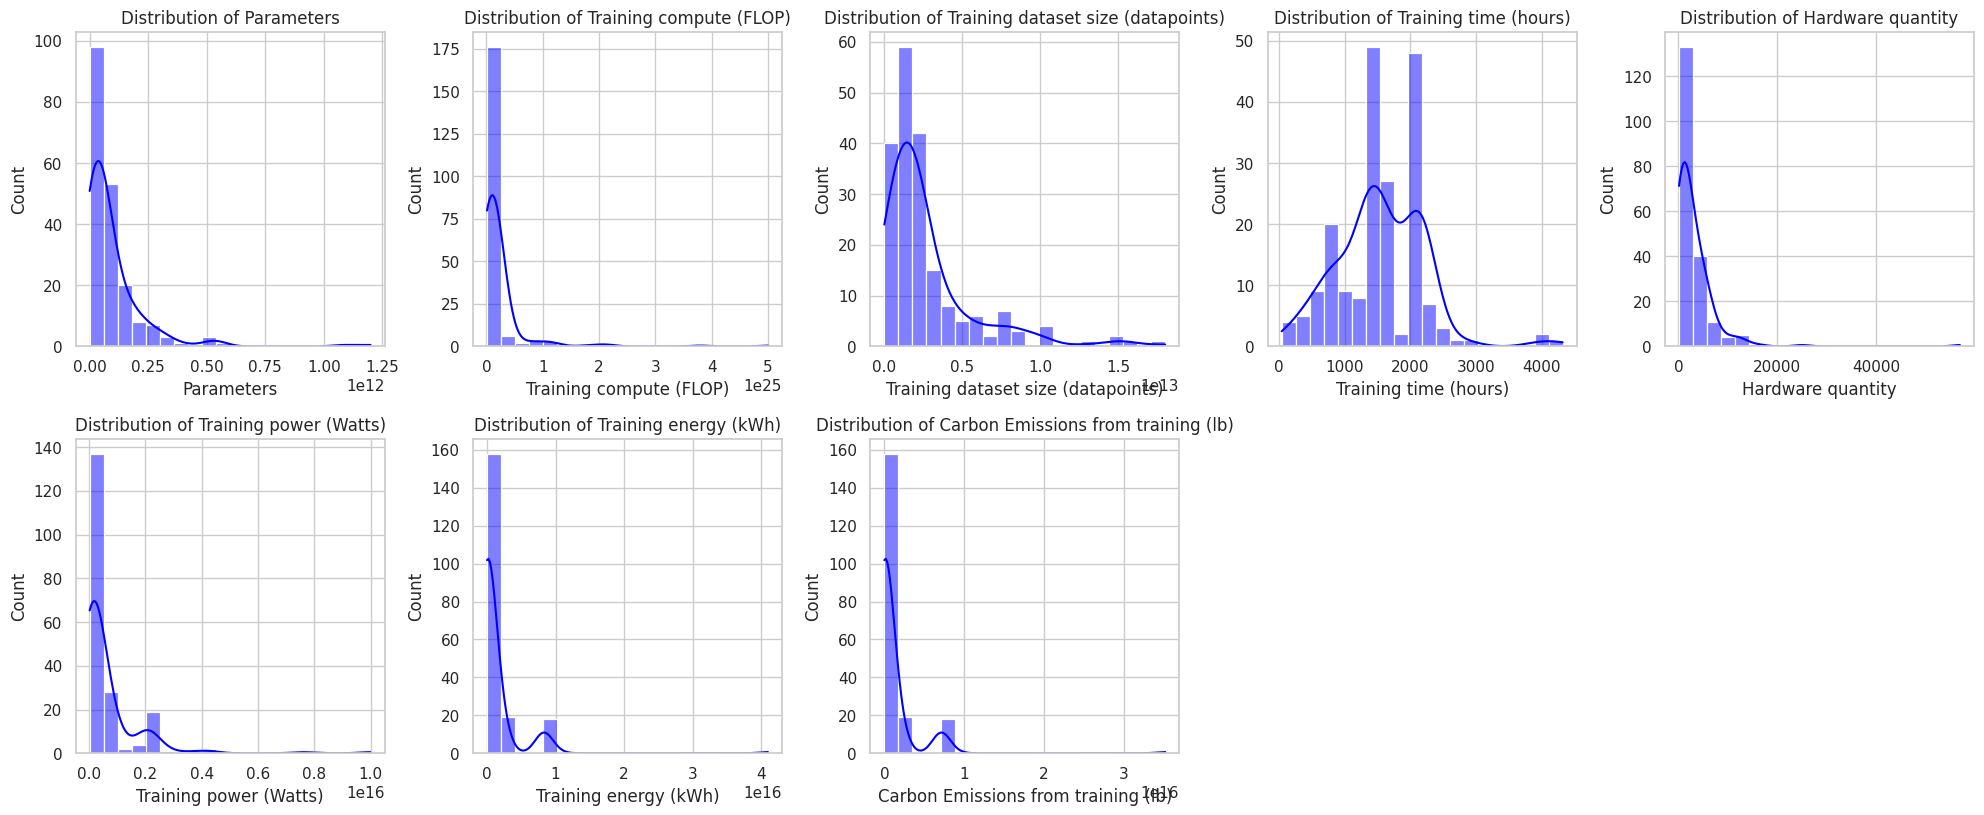

In [103]:
print("Visualizing Data distribution for the retained columns")

# Set up the plot style
sns.set(style="whitegrid")

# List of numerical columns
numerical_columns = large_data.select_dtypes(include=['float64']).columns

# Create a figure with subplots for numerical columns
plt.figure(figsize=(20, 20))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 5, i)
    sns.histplot(large_data[column], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

We notice that almost each column is highly skewed which might pose a risk to our analysis

## Utitlities to handle skewness

We use `logarithmic`, `square root`, and `cube root` transformations to solve data skewness.

Additionally, we use the `yeo-johnson` transformation to solve data skewness which is a combionation of exponential and logarithmic transformations

In [104]:
class SkewedDataHandler:
    def __init__(self, data, columns=None):
        """
        Initialize with a pandas DataFrame and optional column list
        """
        self.data = data.copy()
        self.columns = columns if columns else data.columns
        self.transformers = {}
        self.scalers = {}

    def analyze_skewness(self):
        """
        Calculate and display skewness for each column
        """
        stats_dict = {}
        for col in self.columns:
            skew = stats.skew(self.data[col].dropna())
            stats_dict[col] = {
                'skewness': skew,
                'mean': self.data[col].mean(),
                'median': self.data[col].median(),
                'std': self.data[col].std()
            }
        return pd.DataFrame(stats_dict).T

    def scale_data(self, method='standard', transformed_data=None):
        data_to_scale = transformed_data if transformed_data is not None else self.data
        scaled_data = pd.DataFrame()

        for col in self.columns:
            # Select scaler based on method
            if method == 'standard':
                scaler = StandardScaler()
            elif method == 'minmax':
                scaler = MinMaxScaler()
            elif method == 'robust':
                scaler = RobustScaler()
            else:
                raise ValueError("Method must be 'standard', 'minmax', or 'robust'")

            # Fit and transform the data
            scaled_values = scaler.fit_transform(data_to_scale[col].values.reshape(-1, 1))
            scaled_data[col] = scaled_values.flatten()

            # Store the scaler for future use
            self.scalers[col] = scaler

        return scaled_data

    def plot_distributions(self, transformed_data=None, figsize=(30, 10)):
        """
        Plot original vs transformed distributions
        """
        n_cols = len(self.columns)
        fig, axes = plt.subplots(2, n_cols, figsize=figsize)

        for i, col in enumerate(self.columns):
            # Original distribution
            sns.histplot(self.data[col], kde=True, ax=axes[0, i])
            axes[0, i].set_title(f'Original {col}')
            axes[0, i].set_xlabel(col)

            # Transformed distribution (if provided)
            if transformed_data is not None:
                sns.histplot(transformed_data[col], kde=True, ax=axes[1, i])
                axes[1, i].set_title(f'Transformed {col}')
                axes[1, i].set_xlabel(f'{col} (transformed)')

        plt.tight_layout()
        return fig

    def apply_transformations(self):
        """
        Apply multiple transformations and return the best one for each column
        """
        transformed_data = pd.DataFrame()

        for col in self.columns:
            data = self.data[col].values.reshape(-1, 1)

            # Skip transformation if data contains negative values or zeros
            if (data <= 0).any():
                transformed_data[col] = self.data[col]
                continue

            # Try different transformations
            transformations = {
                'log': np.log1p(data),
                'sqrt': np.sqrt(data),
                'cbrt': np.cbrt(data),
                'yeo-johnson': PowerTransformer(method='yeo-johnson').fit_transform(data)
            }

            # Calculate skewness for each transformation
            skewness = {name: abs(stats.skew(trans.flatten()))
                       for name, trans in transformations.items()}

            # Select transformation with lowest absolute skewness
            best_transform = min(skewness.items(), key=lambda x: x[1])[0]
            transformed_data[col] = transformations[best_transform].flatten()
            self.transformers[col] = best_transform

        return transformed_data

    def handle_outliers(self, method='iqr', threshold=1.5):
        """
        Handle outliers using IQR method or z-score
        """
        cleaned_data = self.data.copy()

        for col in self.columns:
            if method == 'iqr':
                Q1 = cleaned_data[col].quantile(0.25)
                Q3 = cleaned_data[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - threshold * IQR
                upper_bound = Q3 + threshold * IQR
            else:  # z-score
                z_scores = stats.zscore(cleaned_data[col])
                lower_bound = cleaned_data[col].mean() - threshold * cleaned_data[col].std()
                upper_bound = cleaned_data[col].mean() + threshold * cleaned_data[col].std()

            # Cap the values
            cleaned_data[col] = cleaned_data[col].clip(lower=lower_bound, upper=upper_bound)

        return cleaned_data

# Example usage
def process_skewed_data(df, columns_to_process):
    """
    Complete pipeline for handling skewed data
    """
    handler = SkewedDataHandler(df, columns_to_process)

    # 1. Analyze initial skewness
    # print("Initial Skewness Analysis:")
    # print(handler.analyze_skewness())

    # 2. Handle outliers
    cleaned_data = handler.handle_outliers(method='iqr', threshold=1.5)
    handler.data = cleaned_data  # Update the data with cleaned version

    # 3. Apply transformations
    transformed_data = handler.apply_transformations()

    transformed_data = handler.scale_data(method='robust', transformed_data=transformed_data)

    # 4. Plot original vs transformed distributions
    handler.plot_distributions(transformed_data)

    # 5. Analyze final skewness
    handler.data = transformed_data
    # print("\nFinal Skewness Analysis:")
    # print(handler.analyze_skewness())

    return transformed_data, handler.transformers

The first row shows the original dataset (before processing)
The second row shows the processed dataset


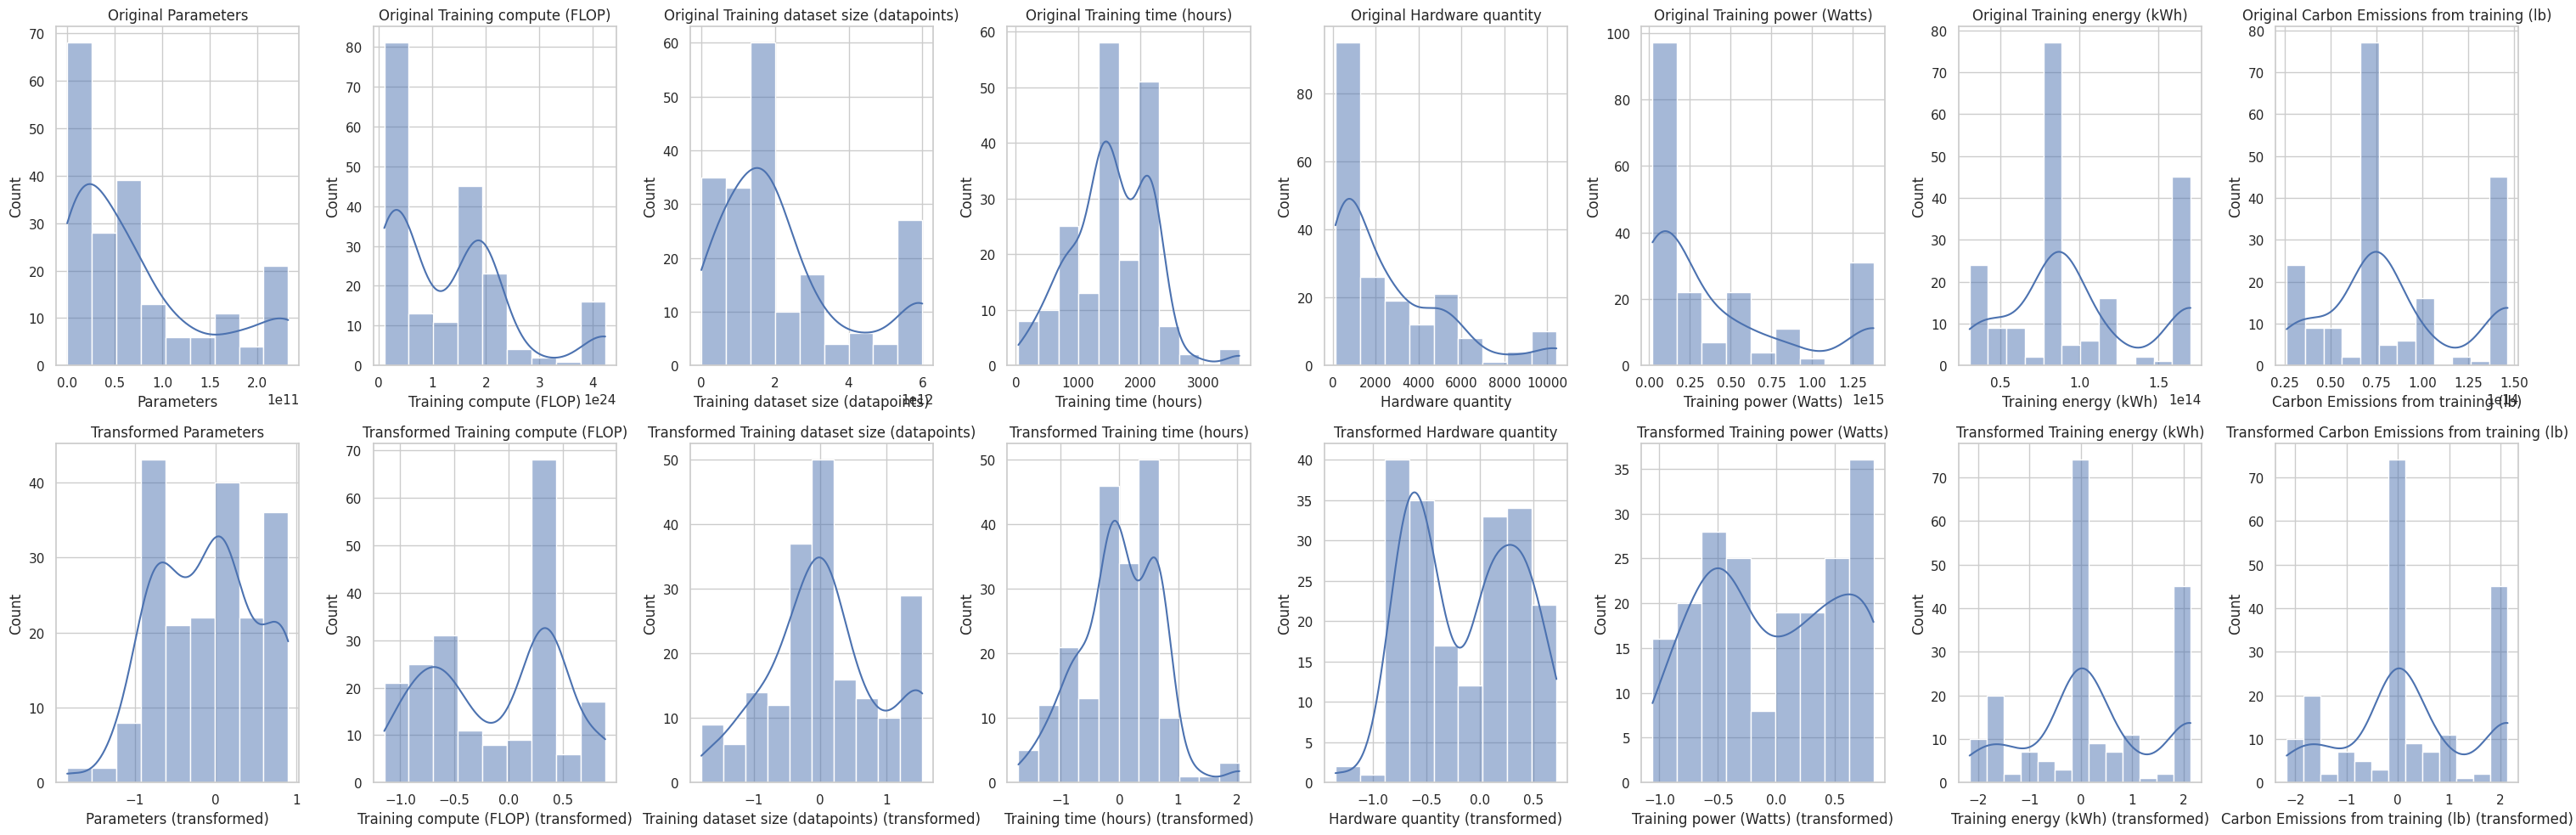

In [105]:
print("The first row shows the original dataset (before processing)")
print("The second row shows the processed dataset")
# Process skewed data
large_data, large_transformers = process_skewed_data(large_data, None)

Similarly, lets look at the distribution for the Bloom Emissions dataset


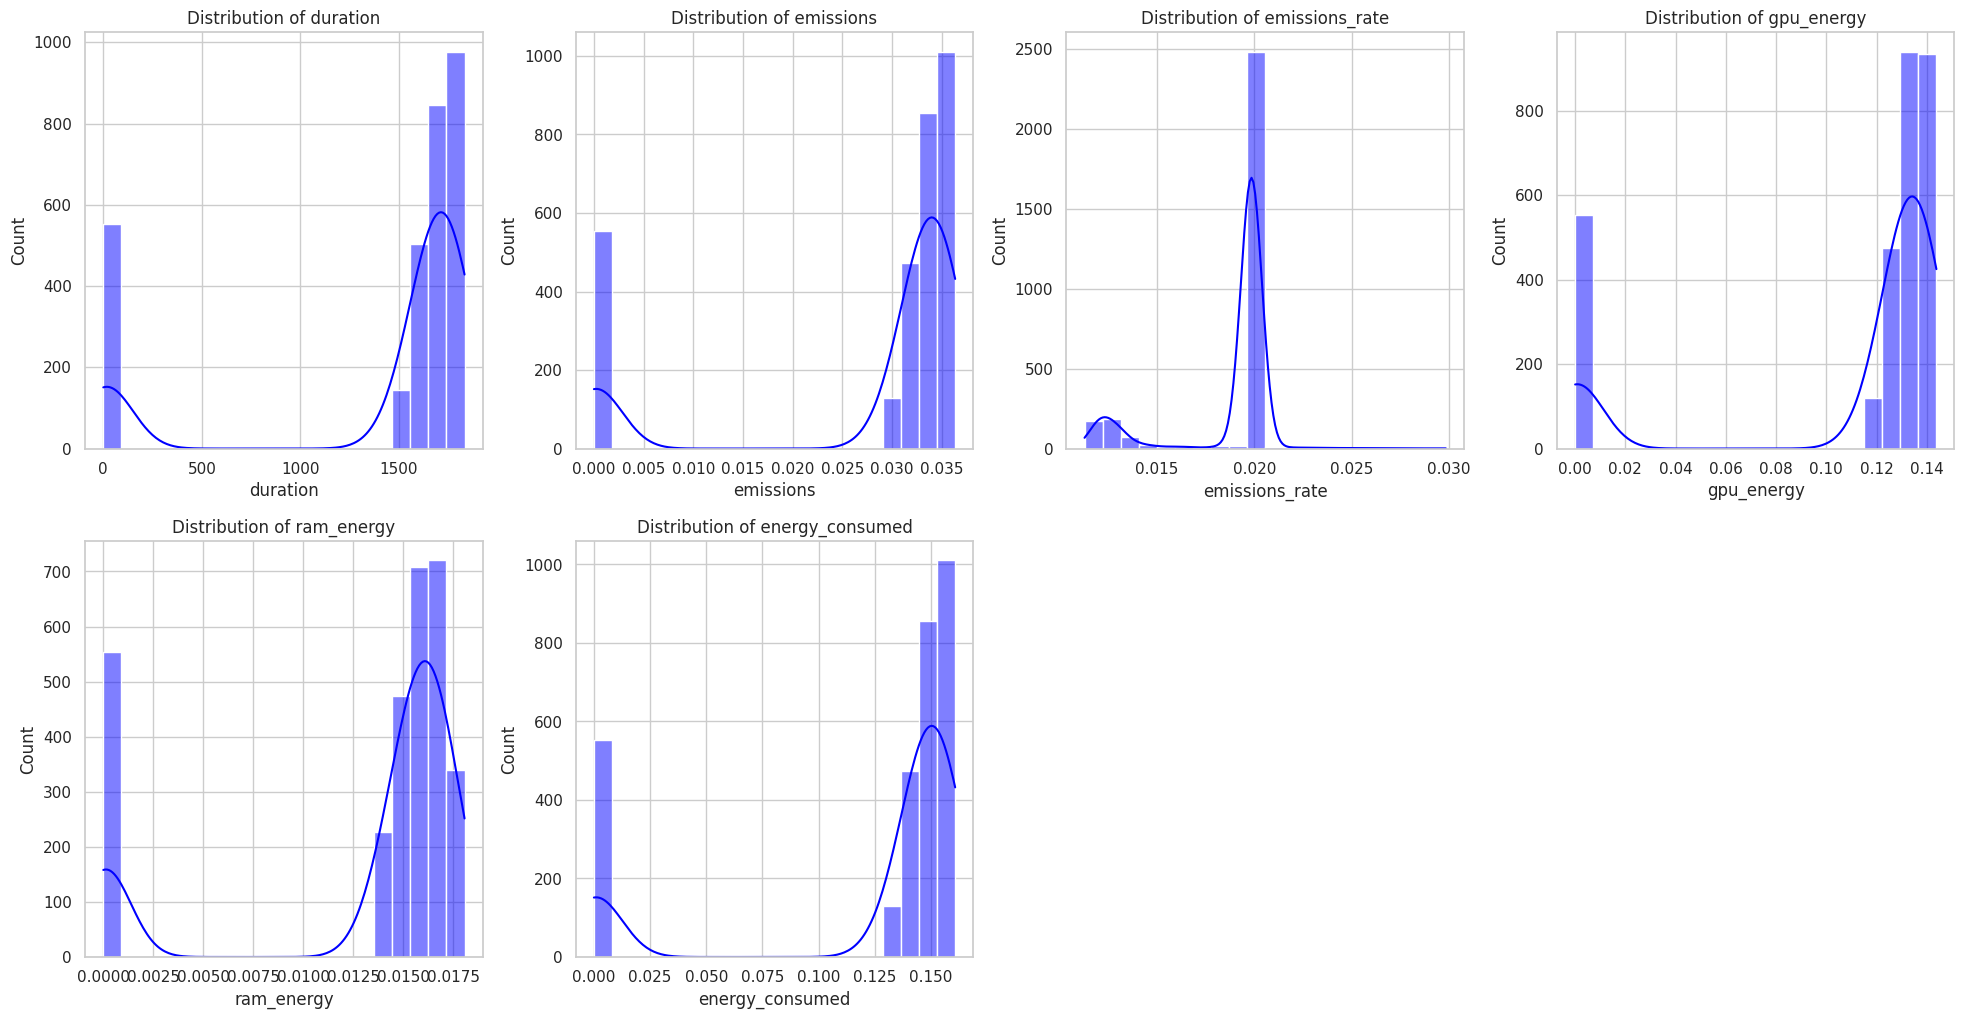

In [106]:
print("Similarly, lets look at the distribution for the Bloom Emissions dataset")

# Set up the plot style
sns.set(style="whitegrid")

# List of numerical columns
numerical_columns = bloom_data.select_dtypes(include=['float64']).columns

# Create a figure with subplots for numerical columns
plt.figure(figsize=(20, 20))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(bloom_data[column], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

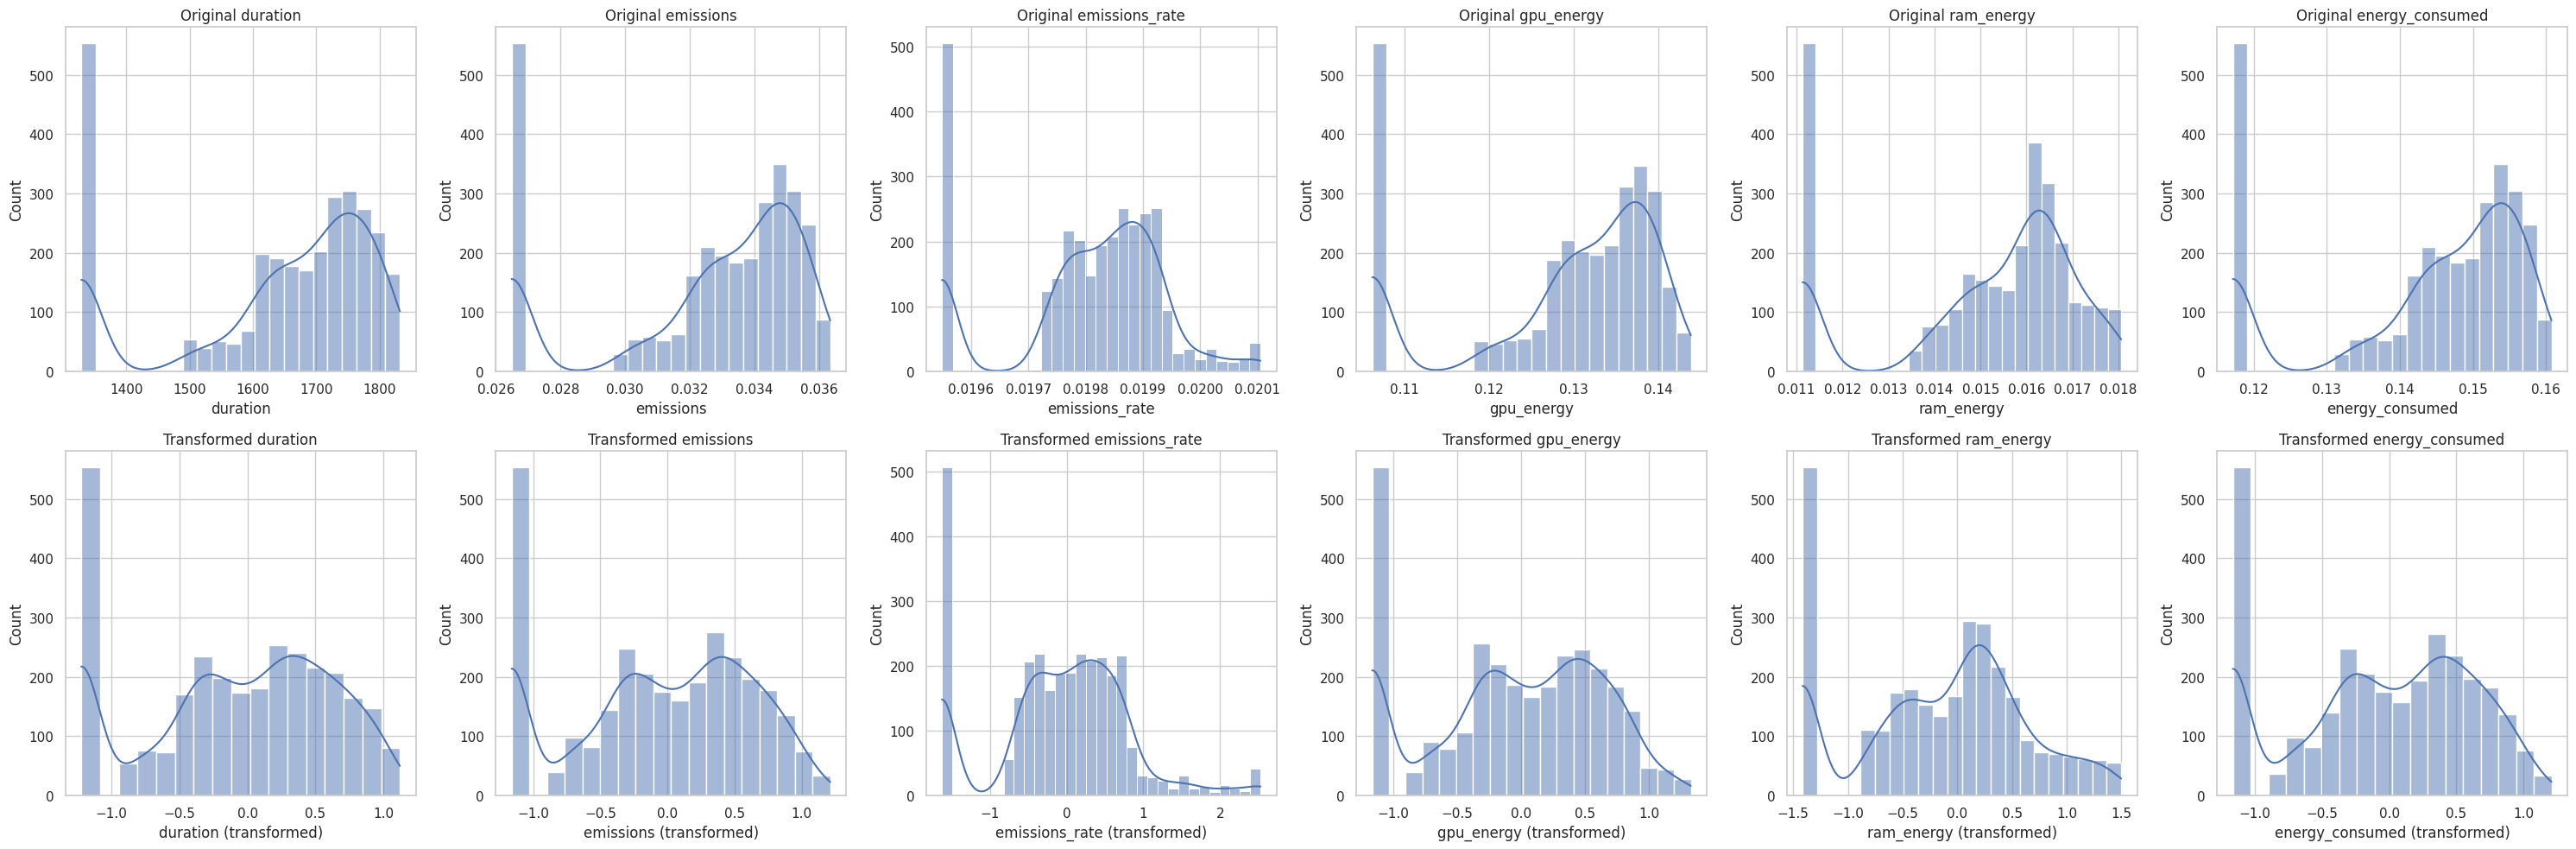

In [107]:
data = bloom_data.copy()

# Process the data
bloom_data, bloom_transformers = process_skewed_data(data, None)

# Computing `pearson`, `kendall`, and `spearman` correlations for a given dataframe

In [108]:
class CorrelationAnalyzer:
    def __init__(self, data):
        """
        Initialize with a pandas DataFrame
        """
        self.data = data
        self.correlation_matrix = None
        self.pvalues = None

    def compute_correlations(self, method='pearson'):
        """
        Compute correlation matrix using specified method
        method: 'pearson', 'spearman', or 'kendall'
        """
        self.correlation_matrix = self.data.corr(method=method)

        # Computing p-values for correlations
        def calculate_pvalues(x, y, method=method):
            if method == 'pearson':
                return stats.pearsonr(x, y)[1]
            elif method == 'spearman':
                return stats.spearmanr(x, y)[1]
            elif method == 'kendall':
                return stats.kendalltau(x, y)[1]

        pvalues = self.data.corr(method=lambda x, y: calculate_pvalues(x, y, method))
        self.pvalues = pvalues

        return self.correlation_matrix

    def plot_correlation_matrix(self, figsize=(12, 10), annot=True, fmt='.2f',
                              cmap='coolwarm', mask_upper=True):
        """
        Plot correlation matrix with customizable parameters
        """
        plt.figure(figsize=figsize)

        # Create mask for upper triangle
        mask = None
        if mask_upper:
            mask = np.triu(np.ones_like(self.correlation_matrix), k=1)

        # Plot correlation matrix
        sns.heatmap(self.correlation_matrix,
                   annot=annot,
                   fmt=fmt,
                   cmap=cmap,
                   mask=mask,
                   square=True,
                   linewidths=0.5,
                   cbar_kws={"shrink": .5})

        plt.title('Correlation Matrix of Training Metrics')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()

        return plt.gcf()

    def get_significant_correlations(self, threshold=0.5, p_value=0.05):
        """
        Get correlations above threshold with significant p-values
        """
        significant_corr = []

        for i in range(len(self.correlation_matrix.columns)):
            for j in range(i):
                if abs(self.correlation_matrix.iloc[i, j]) > threshold and self.pvalues.iloc[i, j] < p_value:
                    significant_corr.append({
                        'variable1': self.correlation_matrix.columns[i],
                        'variable2': self.correlation_matrix.columns[j],
                        'correlation': self.correlation_matrix.iloc[i, j],
                        'p_value': self.pvalues.iloc[i, j]
                    })

        return pd.DataFrame(significant_corr)

def analyze_correlations(data, method='spearman', threshold=0.5):
    """
    Complete pipeline for correlation analysis
    """
    # Initialize analyzer
    analyzer = CorrelationAnalyzer(data)

    # Compute correlations
    correlation_matrix = analyzer.compute_correlations(method=method)

    # Plot correlation matrix
    correlation_plot = analyzer.plot_correlation_matrix()

    # Get significant correlations
    significant_correlations = analyzer.get_significant_correlations(threshold=threshold)

    return {
        'correlation_matrix': correlation_matrix,
        'plot': correlation_plot,
        'significant_correlations': significant_correlations
    }


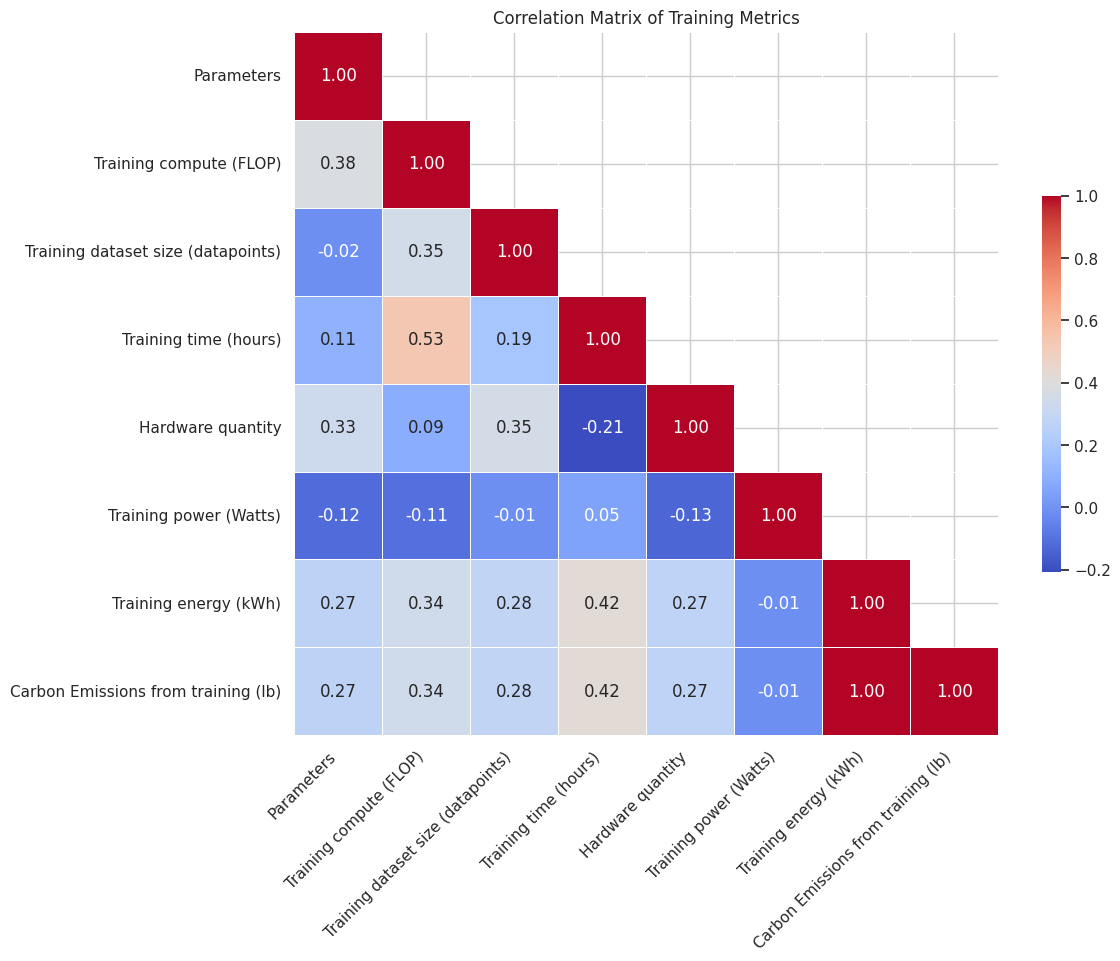

In [109]:
# Run analysis
results = analyze_correlations(
    large_data,
    method='spearman',  # Using Spearman for non-linear relationships
    threshold=0.5
)

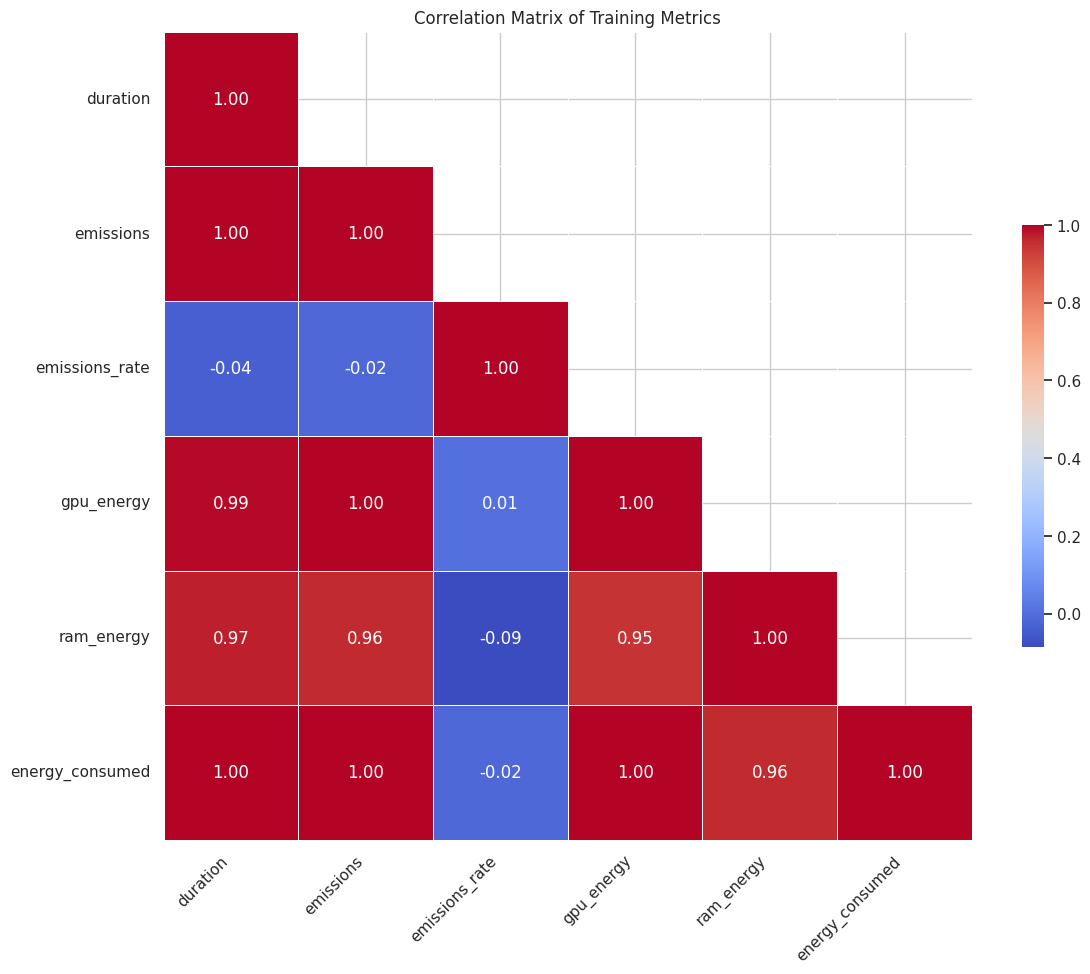

In [110]:
# Run analysis
results = analyze_correlations(
    bloom_data,
    method='spearman',  # Using Spearman for non-linear relationships
    threshold=0.5
)

# Modelling: Unveiling the carbon cost of AI by decoding energy, compute, and scale.

## Models used

### `Linear Regression` and `Decision Trees`

Both these models are inherently **explainable** and highly **interpretable**, which helps in understanding which are the top factors that affect the emissions released by training of AI Models.

## Splitting dataframe into features and labels, and further into train and test sets

In [111]:
from sklearn.model_selection import train_test_split
df = large_data.copy()
X = df.drop(['Carbon Emissions from training (lb)'], axis=1).copy()  # Drop the target and date columns
column = X.columns
y = df['Carbon Emissions from training (lb)'].copy()  # Target column

# Split data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [112]:
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = root_mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE) for a better understanding of prediction error
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f'R-squared: {r_squared:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2e} ~ 0')
print(f'Root Mean Squared Error (RMSE): {rmse:.2e} ~ 0')
print(f'Mean Absolute Error (MAE): {mae:.2e} ~ 0')

R-squared: 1.00
Mean Squared Error (MSE): 1.40e-29 ~ 0
Root Mean Squared Error (RMSE): 3.74e-15 ~ 0
Mean Absolute Error (MAE): 2.27e-15 ~ 0


This test results show that the model is learning the most relevant features and also generalizes well to the test set.

In [113]:
print("Analyzing the coefficients of the Linear Regression Model", end="\n\n")
coef_dict = {}
for feat, coef in zip(model.feature_names_in_, model.coef_):
    coef_dict[feat] = f"{coef:.2e}"

print(json.dumps(coef_dict, indent=4))

Analyzing the coefficients of the Linear Regression Model

{
    "Parameters": "-6.56e-16",
    "Training compute (FLOP)": "-2.11e-15",
    "Training dataset size (datapoints)": "5.13e-16",
    "Training time (hours)": "1.39e-17",
    "Hardware quantity": "5.27e-16",
    "Training power (Watts)": "8.47e-16",
    "Training energy (kWh)": "1.00e+00"
}


Here, we can see that the emissions are most highly related to `Training Energy (kWh)`

## Decision Tree

In [114]:
dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = root_mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f'R-squared: {r_squared:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2e}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2e}')
print(f'Mean Absolute Error (MAE): {mae:.2e}')

R-squared: 1.00
Mean Squared Error (MSE): 4.42e-04
Root Mean Squared Error (RMSE): 2.10e-02
Mean Absolute Error (MAE): 7.63e-03


## Visualizing the Root Node of our Decision Tree

Root Node implies the most important factor for the prediction.

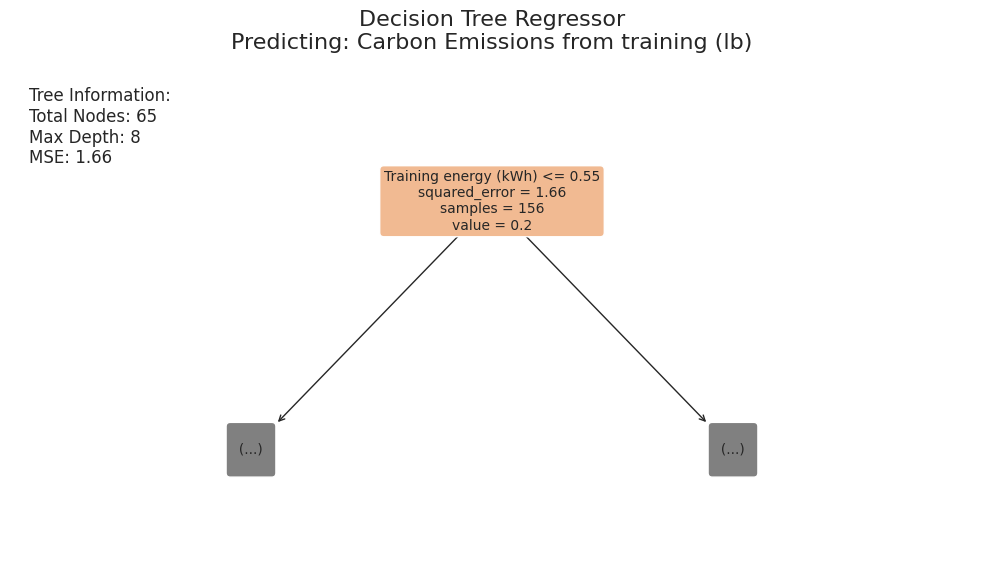

In [115]:
def visualize_decision_tree(model, feature_names=None, target_name=None, max_depth=None, figsize=(30,20)):

    # Create color map for node colors
    colors = [mcolors.to_rgb('lightblue'), mcolors.to_rgb('lightgreen')]
    cm = mcolors.LinearSegmentedColormap.from_list('custom', colors, N=100)

    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    # Plot the tree
    plot_tree(
        model,
        feature_names=feature_names,
        filled=True,
        rounded=True,
        fontsize=10,
        max_depth=max_depth,
        ax=ax,
        precision=2
    )

    # Add title and labels
    title = f"Decision Tree Regressor"
    if max_depth:
        title += f" (Max Depth: {max_depth})"
    if target_name:
        title += f"\nPredicting: {target_name}"

    plt.title(title, fontsize=16, pad=20)

    # Add tree information
    info_text = (
        f'Tree Information:\n'
        f'Total Nodes: {model.tree_.node_count}\n'
        f'Max Depth: {model.get_depth()}\n'
        f'MSE: {model.tree_.impurity[0]:.2f}'
    )
    plt.text(0.02, 0.98, info_text,
             transform=ax.transAxes,
             bbox=dict(facecolor='white', alpha=0.8),
             verticalalignment='top',
             fontsize=12)

    plt.tight_layout()
    return fig, ax

visualize_decision_tree(
        dt_model,
        feature_names=X_train.columns,
        target_name='Carbon Emissions from training (lb)',
        max_depth=0,
        figsize=(10, 6)
    )
plt.show()

In [116]:
root_node = dt_model.feature_names_in_[dt_model.tree_.feature[0]]
print(f"Root Node in the Decision Tree is: {root_node}")

Root Node in the Decision Tree is: Training energy (kWh)


This backs the hypothesis presented by the Linear Regression model that the `Training Energy (kWh)` is the most important feature to predict Carbon Emissions

# Model Justification and Interpretation

As shown above by our analysis, both the Linear Regression and Decision Tree models -- Which are inherently interpretable and explainable, work extremely well for the given task.

Since explainability was at the core of our approach, we preferred these models. And, out data analysis + data pre-processing showed that this worked well.

Question: Write some explanations for what your team did in this section. What did you learn from your predictions? What does this imply about AI in 10 years? 20 years? Do present trends suggest AI is a sustainable venture in the future? How does this tie into the finance industry and how are your hypotheses supported?

# AI Energy Analysis & Financial Implications

## Key Findings
Our analysis revealed that AI model training is heavily energy-intensive, with training costs being the primary driver of carbon emissions.

## Future Implications

### Short-term (10 years)
Financial institutions must balance AI advancement with growing energy costs and environmental impact. The high energy consumption of current AI training methods suggests unsustainable cost scaling.

### Long-term (20 years)
Without significant efficiency improvements, AI's energy demands could become prohibitively expensive for many financial applications, particularly in large-scale deployment.

## Financial Industry Impact
- Energy costs will be a crucial factor in AI ROI calculations
- Investment in energy-efficient AI solutions could provide competitive advantages
- Data centers supporting AI operations need strategic planning for sustainability

## Conclusion
Our findings support the hypothesis that current AI training methods need substantial efficiency improvements to remain financially viable at scale.

# Visualizations from our Video Submission

In [117]:
notable_raw = pd.read_csv('notable_ai_models.csv')

In [118]:
notable_raw.head()

,Model,Domain,Organization,Organization categorization,Country (from Organization),Authors,Publication date,Reference,Link,Citations,...,Finetune compute (FLOP),Finetune compute notes,Batch size,Batch size notes,Model accessibility,Training code accessibility,Inference code accessibility,Accessibility notes,Frontier model,Training power draw (W)
0,CHAI-1,Biology,Chai discovery,Industry,United States of America,"Jacques Boitreaud, Jack Dent, Matthew McPartlo...",2024-10-15,Introducing Chai-1: Decoding the molecular int...,https://www.chaidiscovery.com/blog/introducing...,0.0,...,NaN,NaN,1.280000e+02,Taken from paper,Open weights (non-commercial),Open (non-commercial),NaN,https://github.com/chaidiscovery/chai-lab?tab=...,NaN,1.127710e+05
1,Meta Movie Gen Video,Video,Meta AI,Industry,United States of America,"Adam Polyak, Amit Zohar, Andrew Brown, Andros ...",2024-10-04,Movie Gen: A Cast of Media Foundation Models,https://ai.meta.com/static-resource/movie-gen-...,NaN,...,NaN,NaN,NaN,NaN,Unreleased,NaN,NaN,NaN,NaN,9.473720e+06
2,Qwen2.5-72B,Language,Alibaba,Industry,China,NaN,2024-09-19,Qwen2.5: A Party of Foundation Models!,https://qwenlm.github.io/blog/qwen2.5/,NaN,...,NaN,NaN,NaN,NaN,Open weights (unrestricted),Unreleased,NaN,license: allows commercial. weights only\nhttp...,NaN,NaN
3,Table Tennis Agent,Robotics,Google DeepMind,Industry,"Multinational,United States of America,United ...","David B. D'Ambrosio, Saminda Abeyruwan, Laura ...",2024-08-07,Achieving Human Level Competitive Robot Table ...,https://deepmind.google/research/publications/...,NaN,...,NaN,NaN,NaN,NaN,Unreleased,Unreleased,NaN,NaN,NaN,NaN
4,AFM-server,Language,Apple,Industry,United States of America,"Andy Narayanan, Aonan Zhang, Bowen Zhang, Chen...",2024-07-29,Apple Intelligence Foundation Language Models,https://machinelearning.apple.com/research/app...,NaN,...,NaN,NaN,1.894975e+07,Main pretraining uses sequence length of 4096 ...,Hosted access (no API),Unreleased,NaN,NaN,NaN,3.466814e+06


In [119]:
print(f"Columns of Notable AI Models Dataset: {notable_raw.columns}")

Columns of Notable AI Models Dataset: Index(['Model', 'Domain', 'Organization', 'Organization categorization',
       'Country (from Organization)', 'Authors', 'Publication date',
       'Reference', 'Link', 'Citations', 'Notability criteria',
       'Notability criteria notes', 'Parameters', 'Parameters notes',
       'Training compute (FLOP)', 'Training compute notes', 'Training dataset',
       'Training dataset notes', 'Training dataset size (datapoints)',
       'Dataset size notes', 'Epochs', 'Training time (hours)',
       'Training time notes', 'Training hardware', 'Hardware quantity',
       'Hardware utilization', 'Training compute cost (2023 USD)',
       'Compute cost notes', 'Confidence', 'Abstract', 'Base model',
       'Finetune compute (FLOP)', 'Finetune compute notes', 'Batch size',
       'Batch size notes', 'Model accessibility',
       'Training code accessibility', 'Inference code accessibility',
       'Accessibility notes', 'Frontier model', 'Training power draw 

In [120]:
notable_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Model                               863 non-null    object 
 1   Domain                              863 non-null    object 
 2   Organization                        850 non-null    object 
 3   Organization categorization         850 non-null    object 
 4   Country (from Organization)         850 non-null    object 
 5   Authors                             831 non-null    object 
 6   Publication date                    863 non-null    object 
 7   Reference                           854 non-null    object 
 8   Link                                861 non-null    object 
 9   Citations                           753 non-null    float64
 10  Notability criteria                 863 non-null    object 
 11  Notability criteria notes           440 non-n

In [121]:
notable_raw['Publication date'] = pd.to_datetime(notable_raw['Publication date'], errors='coerce')
notable_raw['Training compute (FLOP)'] = pd.to_numeric(notable_raw['Training compute (FLOP)'], errors='coerce')
notable_data = notable_raw.copy()
notable_raw = notable_raw[['Publication date', 'Training compute (FLOP)']].dropna()

In [122]:
print("Null values in the Notable AI Models dataset after preprocessing", end="\n\n")
print(notable_raw.isna().sum())

Null values in the Notable AI Models dataset after preprocessing

Publication date           0
Training compute (FLOP)    0
dtype: int64


## Top 10 ML Domains

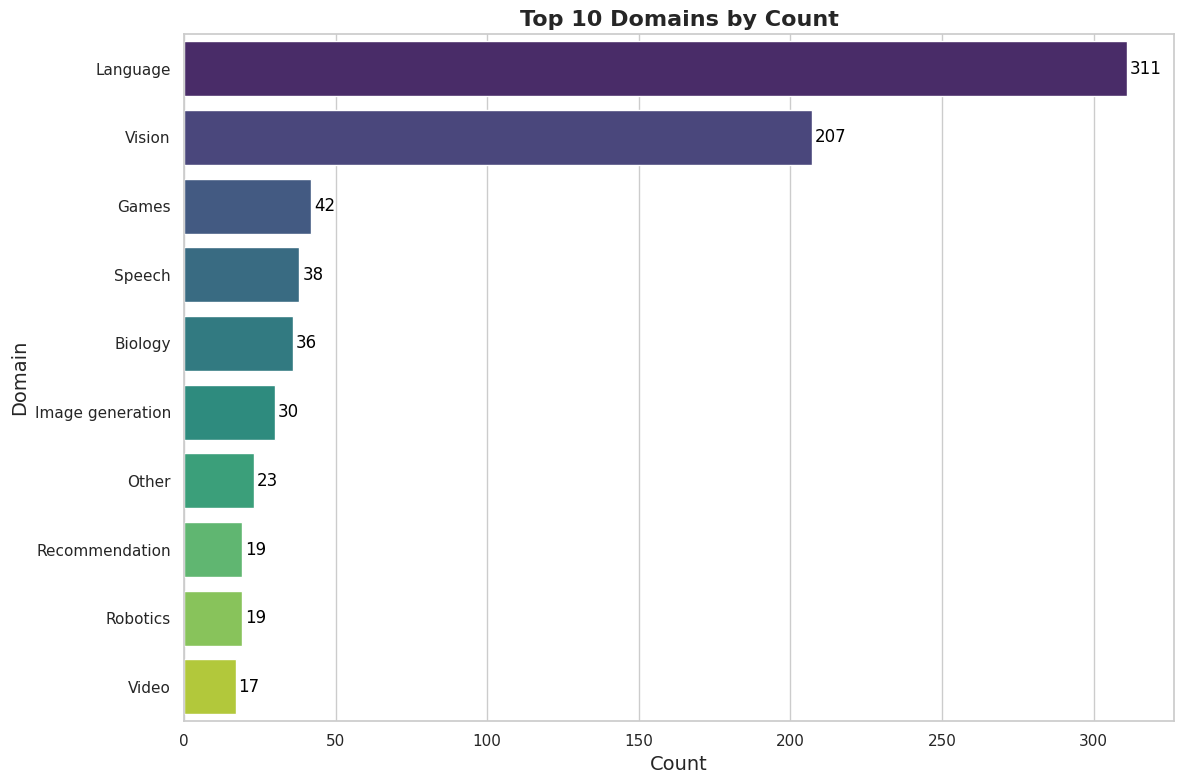

In [123]:
# Extract the top 10 domains by count
top_10_domains = notable_data['Domain'].value_counts().head(10)

# Filter the data to include only the top 10 domains
filtered_data = notable_data[notable_data['Domain'].isin(top_10_domains.index)]

# Set Seaborn style for a clean look
sns.set_theme(style="whitegrid")

# Plot the count of systems for the top 10 domains
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=top_10_domains.index,
    x=top_10_domains.values,
    palette="viridis"
)
plt.title("Top 10 Domains by Count", fontsize=16, weight='bold')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Domain", fontsize=14)

# Annotate bar plot with counts
for i, value in enumerate(top_10_domains.values):
    ax.text(value + 1, i, str(value), color='black', va='center', fontsize=12)

# Adjust layout for readability
plt.tight_layout()
plt.show()

## Training Compute vs Publication Date

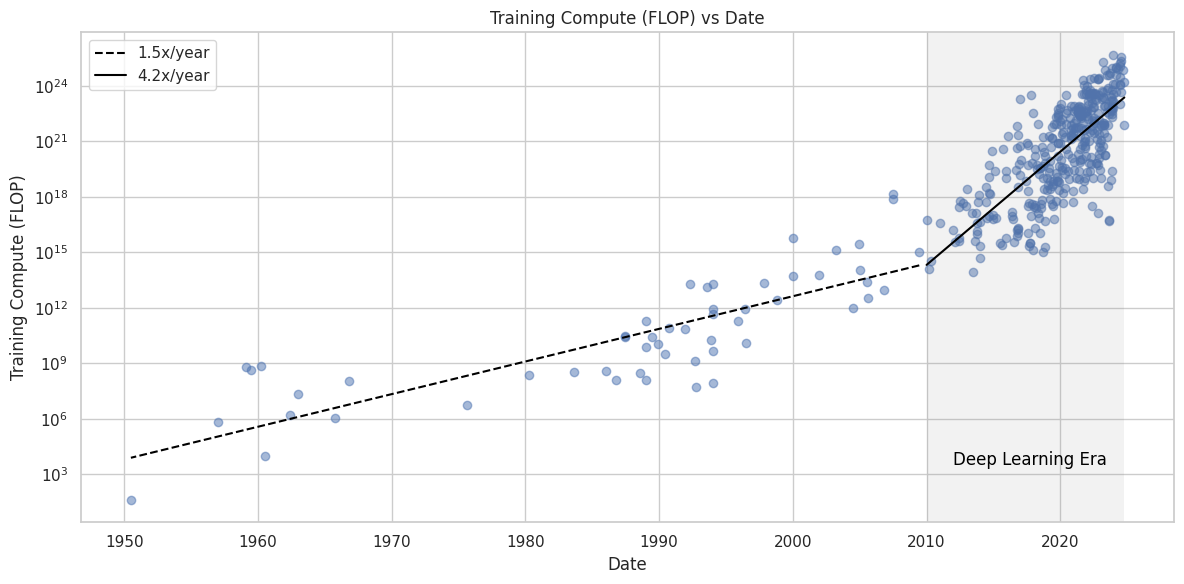

In [124]:
# Load CSV data
data = pd.read_csv('notable_ai_models.csv')

# Clean and convert relevant columns
data['Publication date'] = pd.to_datetime(data['Publication date'], errors='coerce')
data['Training compute (FLOP)'] = pd.to_numeric(data['Training compute (FLOP)'], errors='coerce')

# Drop rows with missing values in key columns
data = data[['Publication date', 'Training compute (FLOP)']].dropna()

# Split data into pre-2010 and post-2010 for different eras
pre_dl_era = data[data['Publication date'] < '2010-01-01']
dl_era = data[data['Publication date'] >= '2010-01-01']

# Extract relevant data for plotting
x_pre_dl = pre_dl_era['Publication date']
y_pre_dl = pre_dl_era['Training compute (FLOP)']

x_dl = dl_era['Publication date']
y_dl = dl_era['Training compute (FLOP)']

# Create scatter plot for training compute growth
plt.figure(figsize=(12, 6))
plt.scatter(data['Publication date'], data['Training compute (FLOP)'], alpha=0.5)

# Set logarithmic scale for y-axis
plt.yscale('log')

# Add labels and title
plt.title('Training Compute (FLOP) vs Date')
plt.xlabel('Date')
plt.ylabel('Training Compute (FLOP)')

# Fit a trend line with a polynomial fit (linear in log space) for Pre-Deep Learning Era
coefficients_pre_dl = np.polyfit(x_pre_dl.map(lambda date: date.toordinal()), np.log10(y_pre_dl), 1)
trend_line_pre_dl = np.poly1d(coefficients_pre_dl)

# Plot the Pre-Deep Learning Era trend line
plt.plot(x_pre_dl, 10**trend_line_pre_dl(x_pre_dl.map(lambda date: date.toordinal())), color='black', linestyle='--', label=f'1.5x/year')

# Fit a trend line with a polynomial fit (linear in log space) for Deep Learning Era
coefficients_dl = np.polyfit(x_dl.map(lambda date: date.toordinal()), np.log10(y_dl), 1)
trend_line_dl = np.poly1d(coefficients_dl)

# Plot the Deep Learning Era trend line
plt.plot(x_dl, 10**trend_line_dl(x_dl.map(lambda date: date.toordinal())), color='black', linestyle='-', label=f'4.2x/year')

# Add 'Deep Learning Era' label
plt.axvspan(pd.to_datetime('2010-01-01'), max(data['Publication date']), color='grey', alpha=0.1, lw=0)
plt.text(pd.to_datetime('2012-01-01'), 10**3.5, 'Deep Learning Era', fontsize=12, color='black')

# Show legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

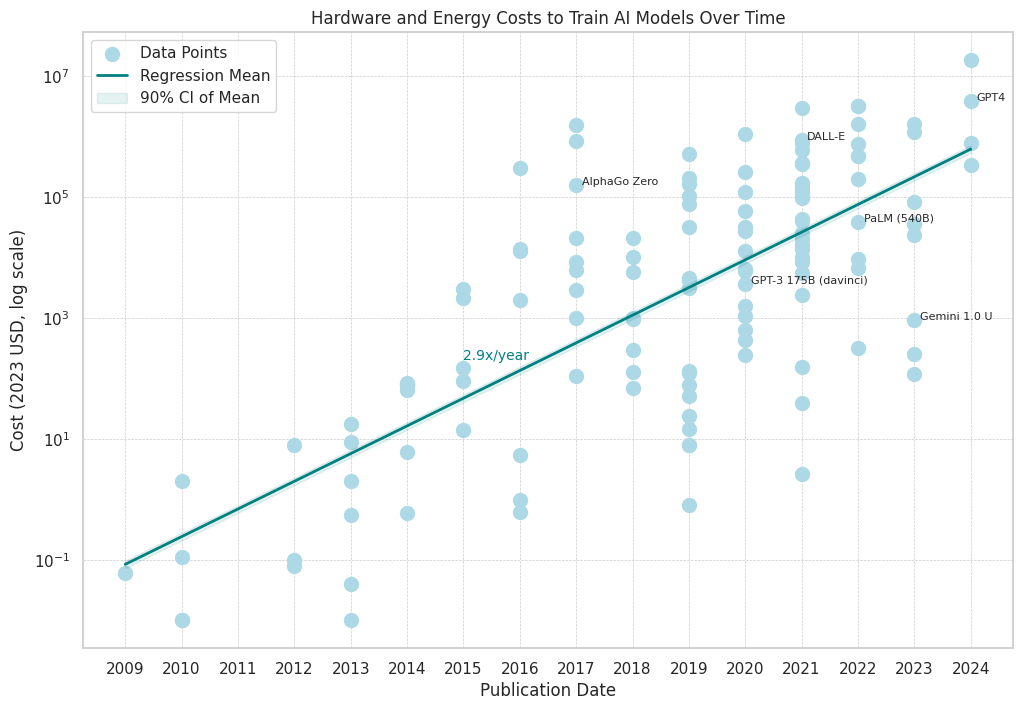

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load CSV data
file_path = 'mlsystems.csv'
data = pd.read_csv(file_path)

# Convert 'Publication date' to datetime format
data['Publication date'] = pd.to_datetime(data['Publication date'], errors='coerce')

# Clean 'Training compute cost (2020 USD)'
data['Training compute cost (2020 USD)'] = data['Training compute cost (2020 USD)'].replace({'\$': '', ',': ''}, regex=True)
data['Training compute cost (2020 USD)'] = pd.to_numeric(data['Training compute cost (2020 USD)'], errors='coerce')

# Filter for valid data
valid_data = data.dropna(subset=['Publication date', 'Training compute cost (2020 USD)'])
valid_data = valid_data[valid_data['Training compute cost (2020 USD)'] > 0]

# Extract relevant columns
pub_years = valid_data['Publication date'].dt.year
costs = valid_data['Training compute cost (2020 USD)']

# Perform linear regression on log-transformed costs
log_costs = np.log10(costs)
slope, intercept, _, _, std_err = stats.linregress(pub_years, log_costs)

# Calculate regression line and confidence intervals
regression_line_log = intercept + slope * pub_years
regression_line = 10 ** regression_line_log  # Back to original scale

ci_upper_log = regression_line_log + 1.645 * std_err
ci_lower_log = regression_line_log - 1.645 * std_err

ci_upper = 10 ** ci_upper_log  # Upper CI
ci_lower = 10 ** ci_lower_log  # Lower CI

# Calculate annotation position dynamically for year 2019
year_for_annotation = 2015
y_value_for_annotation = 10 ** (intercept + slope * year_for_annotation)

# Calculate dynamic growth rate based on slope (2.4x/year is an approximation)
growth_rate = 10 ** slope

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(pub_years, costs, color='lightblue', label='Data Points', s=100)
plt.plot(pub_years, regression_line, color='teal', label='Regression Mean', linewidth=2)
plt.fill_between(pub_years, ci_lower, ci_upper, color='teal', alpha=0.1, label='90% CI of Mean')

plt.annotate(f'{growth_rate:.1f}x/year', xy=(year_for_annotation, y_value_for_annotation), xytext=(2015, 20e1),
             fontsize=10, color='teal')

# Add labels for key models based on publication dates
key_models = {
    'AlphaGo Zero': 2017,
    'GPT-3 175B (davinci)': 2020,
    'DALL-E': 2021,
    'PaLM (540B)': 2022,
    'GPT4': 2024,
    'Gemini 1.0 U': 2023,
    #Inflection-2': 2024
}

for model, year in key_models.items():
    if year in pub_years.values:
        plt.text(year + 0.1, costs[pub_years == year].values[0], model, fontsize=8)

# Formatting the plot
plt.yscale('log')
plt.xticks(np.arange(min(pub_years), max(pub_years) + 1, 1))
plt.xlabel('Publication Date')
plt.ylabel('Cost (2023 USD, log scale)')
plt.title('Hardware and Energy Costs to Train AI Models Over Time')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()

# Show plot
plt.show()